# Problem Set 1

### Before You Start

For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.

Note: you do not have to use notebooks to solve this PS.  However, you have to submit
* your code
* your results
* your explanations
whatever means you use to solve this assignment.

It is all fine to discuss the problems and way how to solve these with
your classmates and instructors.  However, the solutions must be your
own.  Don't copy-paste each other solutions!

## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

Your task is to analyze the nycflights13 data (in the R package of the
                                               same name).  The
                                               necessary csv
files are provided on canvas (in files/data).  An easy way to get the
explanations is on the the [package page on R documentation](https://www.rdocumentation.org/packages/nycflights13/versions/1.0.0). 

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.

Always comment your results, preferably in a separate markdown cell.


## Preliminaries

You should also make sure the following libraries load correctly.
Below are a few basic data description tasks already done for you. 

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.6.1 (need at least 1.0)
Numpy version:        1.16.4 (need at least 1.7.1)
SciPy version:         1.2.1 (need at least 0.12.0)
Pandas version:       0.24.2 (need at least 0.11.0)
Mapltolib version:     3.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.21.2 (need at least 0.13.1)


In [2]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
#path = os.getcwd()
#print(path)
#flights_df= pd.read_csv('../data/flights.csv.bz2')

In [3]:
#Reading the flights.csv file
path = os.getcwd()
print(path)
flights_df= pd.read_csv('flights.csv')

C:\Users\DivyaGauravTripathi


In [4]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
tail
         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771    

## Some Tips

* This assignment involves extensive Data frame splitting and
  aggregation. You should look into the details of the methods
  groupby, transform, sum, count, mean etc 
* Many of the tasks in the assignment can be done either through the
  Pandas Data Frame or by converting the data frames to Series. Many
  of the methods in the numpy are applicable to Series only. When
  stuck, try to explore the type of object (Pandas Data Frame or Numpy
  Series) you are dealing with. 

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [6]:
# Your code here

#We would convert the data into a data frame 
flights_dataframe = pd.DataFrame(flights_df)


In [7]:
# creating another data frame for all flights to Los Angeles 
flights_to_lax = flights_dataframe[flights_dataframe.dest == "LAX"]

#checking the length of flights_to_lax
len(flights_to_lax)

#This tells that there were 16174 flights from NYC to Los Angeles in 2013

16174

### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [8]:
# Your code here
# Check number of flights for each airline
flights_to_lax.groupby('carrier').size() 

#UA had the most number of flights(5823)
#B6 had the least number of flights(1688)

carrier
AA    3582
B6    1688
DL    2501
UA    5823
VX    2580
dtype: int64

### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [9]:
# Your code here
flights_to_lax['tailnum'].nunique()

#There were 991 unique airplanes that flew from NYC to LAX

991

### (d)

What is the average arrival delay for flights from NYC to LAX?

In [10]:
# Your code here
flights_to_lax['arr_delay'].mean()

#The mean arrival delay from NYC to LAX is 0.5471

0.5471109447148383

### (e)

What proportion of flights to LAX come from each NYC airport?

In [11]:
# Your code here
#W are finding out number of flights from each airport
flights_to_lax.groupby('origin').size()


origin
EWR     4912
JFK    11262
dtype: int64

In [12]:
"""
This tells we had 4912 flights from EWR and 11262 flights from JFK. So we had a total 16,174 flights.

"""

#Proportion of flights from EWR = 0.3036972919500433
EWR_proportion = 4912/16174
EWR_proportion



0.3036972919500433

In [13]:
#Proportion of flights from JFK = 0.6963027080499568 
JFK_proportion = 11262/16174
JFK_proportion

0.6963027080499568

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [14]:
#I would create a copy of the dataframe as fl_df
fl_df = flights_dataframe.copy()

In [15]:
# Your code here
# I would add a column for dates by concatenating year, month and day
fl_df['date'] = fl_df['year'].astype(str)+ "-" + fl_df['month'].astype(str) + "-"+ fl_df['day'].astype(str)


In [16]:
#I would create another data frame for average of all columns grouped by date
mean_dep_delay_df = pd.DataFrame(fl_df.groupby('date').mean())

In [17]:
#Finding date of maximum departure delay
mean_dep_delay_df.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

#The date with maximun average departure delay is 2013-3-8

date
2013-3-8    83.536921
Name: dep_delay, dtype: float64

In [18]:
#Finding the date of maximun arrival delay
mean_dep_delay_df.sort_values(['arr_delay'], ascending = False)['arr_delay'].head(1)

#The date with maximun arrival departure delay is 2013-3-8

date
2013-3-8    85.862155
Name: arr_delay, dtype: float64

### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [19]:
# Your code here
#We would find the count of number of delayed flights and magnitude of departure delay for best and worst day to fly out of NYC.

In [20]:
#We would subset our data frame for those flights having dep_delay > 0
subset_depdelay = fl_df[fl_df['dep_delay'] > 0]

In [21]:
type(subset_depdelay)

pandas.core.frame.DataFrame

In [22]:
#We would find the count of delayed flights for each day

In [23]:
#We are grouping by date and finding the count of delayed flights for every day
dep_delay_count = pd.DataFrame(subset_depdelay.groupby('date').count())

In [24]:
#dep_delay_count

#We can find that the 'Unnamed: 0' column has count of departure delayed for each date, so we rename that column to count_depdelay

dep_delay_count.rename(columns={'Unnamed: 0': 'count_depdelay'}, inplace=True)



In [25]:
dep_delay_count.sort_values(['count_depdelay'], ascending = False)['count_depdelay'].head(1)

#The date with the most number of delayed flights is 2013-12-23

date
2013-12-23    674
Name: count_depdelay, dtype: int64

In [26]:
#We would find the highest departure delay of a flight in a day

subset_depdelay.sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

#This told us that the maximum delay in a day is 1301 minutes and the index of that row is 7072

7072    1301.0
Name: dep_delay, dtype: float64

In [27]:
#So we find the row corresponding to index 7072

subset_depdelay.loc[ 7072 , : ]

#That is the row of maximum departure delay and its date is 2013-1-9

Unnamed: 0        7073
year              2013
month                1
day                  9
dep_time           641
dep_delay         1301
arr_time          1242
arr_delay         1272
carrier             HA
tailnum         N384HA
flight              51
origin             JFK
dest               HNL
air_time           640
distance          4983
hour                 6
minute              41
date          2013-1-9
Name: 7072, dtype: object

In [28]:


#The date with highest flight delay is 2013-1-9

In [29]:
#The date with most number of delayed flights: 2013-12-23
#The date with the highest flight delay: 2013-1-9

#So these two dates would have been worst to fly out of NYC

In [30]:
"""
We would now find the best day to fly out of NYC, so we find the day with lease departure delay
"""

'\nWe would now find the best day to fly out of NYC, so we find the day with lease departure delay\n'

In [31]:
dep_delay_count.sort_values(['count_depdelay'], ascending = True)['count_depdelay'].head(1)

#So the day with lease count of delayed flights is 2013-11-2

date
2013-11-2    129
Name: count_depdelay, dtype: int64

In [32]:
#Finding the magnitude of lease departure delay
subset_depdelay.sort_values(['dep_delay'], ascending = True)['date'].head(1)

#So the date with lease magnitude of departure delay is 2013-4-25

188482    2013-4-25
Name: date, dtype: object

In [33]:
#We would combine our findings for best and worst days to fly out of NYC.

In [34]:

#Lets write our findings for the worst day to fly out of NYC

"""The day with highest count of number of delayed flights was 2013-12-23. The day with the flight of highest magnitude of departure delay was 2013-1-9."""

'The day with highest count of number of delayed flights was 2013-12-23. The day with the flight of highest magnitude of departure delay was 2013-1-9.'

In [35]:
#Lets write our findings for the best day to fly out of NYC

"""The day with least count of number of delayed flights was 2013-11-2. The day with the flight of least magnitude of departure delay was 2013-4-25."""

'The day with least count of number of delayed flights was 2013-11-2. The day with the flight of least magnitude of departure delay was 2013-4-25.'

### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [36]:
#Our fl_df dataframe has both positive and negative flight delays. We only need the carrier and dep_delay columns.

#So we create another data frame of only carrier and dep_delay columns
carrier_depdelay_df =  fl_df.loc[:,('carrier','dep_delay')]

#We group by carrier and find mean dep_delay for each carrier, sort in ascending order for least departure delay
carrier_depdelay_df.groupby('carrier').mean().sort_values(['dep_delay'], ascending = True)['dep_delay'].head(1)

carrier
US    3.782418
Name: dep_delay, dtype: float64

In [37]:
#We group by carrier and find mean dep_delay for each carrier, sort in descending order for highest departure delay
carrier_depdelay_df.groupby('carrier').mean().sort_values(['dep_delay'], ascending = False)['dep_delay'].head(1)

carrier
F9    20.215543
Name: dep_delay, dtype: float64

In [38]:
#So the airline with least average departure delay is US. Its mean departure delay is 3.782
#So the airline with highest average departure delay is F9. Its mean departure delay is 20.215543

### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

In [39]:
# Your code here

"""I would add another row based on seasons like the following: 1,2,3- Winter; 4,5,6- Spring; 
7,8,9- Summer; 10,11,12- Autumn """

#I would create a function that would return season based on month

def season_func(month):
#    month=row['month']
    if month == 1 or month == 2 or month == 3:
        return "winter"
    if month == 4 or month == 5 or month == 6:
        return "spring"
    if month == 7 or month == 8 or month == 9:
        return "summer"
    #if month == 10 or month == 11 or month == 12:
    else:
        return "autumn"
    


In [40]:
#I would make a copy of fl_df
fl_season = fl_df.copy()


In [41]:
#I would add another column for season based on our function
fl_season['season'] = fl_season['month'].apply(season_func)

In [42]:
#We would find mean departure delay for every season.
season_delay = fl_season.groupby('season')['dep_delay'].mean()

In [43]:
season_delay

season
autumn     9.363125
spring    15.878225
summer    13.794974
winter    11.415210
Name: dep_delay, dtype: float64

<BarContainer object of 4 artists>

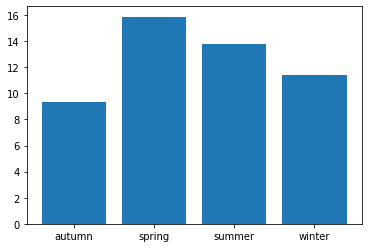

In [44]:
plt.bar(season_delay.index,season_delay)

In [45]:
#This tells that the departure delay is highest in spring season(April, May, June) 
#and least in autumn season(October, November, December).

### (e)

On average, how do departure delays vary over the course of a day?

In [46]:
# Your code here
#We would find out how departure delay varies based on hour

#We would find the mean of departure delay grouped by hour
hour_df = fl_df.copy()
hour_df = pd.DataFrame(hour_df.groupby('hour')['dep_delay'].mean())


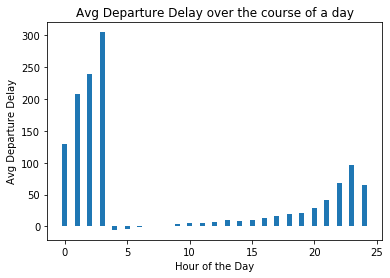

In [47]:
plt.bar(range(25), hour_df.dep_delay, 0.40)
plt.xlabel('Hour of the Day', size = 10)
plt.ylabel('Avg Departure Delay', size = 10)
plt.title('Avg Departure Delay over the course of a day')
plt.show()


In [48]:
#The above graph tells us that the average departure delay is highest between 0th to 4th hour.
#It tells us that the mean departure delay of flights is highest from 12 am to 4 am.

## Question 3

Which flight departing NYC in 2013 flew the slowest?

Note: compute the speed as distance/time.

In [49]:
# Your code here
#speed = distance/time
#So we would add another column for speed of the flight. 
#The time is given in minutes, so we divide it by 60 to make speed as miles per hour.

fl_df['speed'] = fl_df.distance/(fl_df.air_time/60)




In [50]:
fl_df.sort_values('speed',ascending = True)['speed'].head(1)

24098    76.8
Name: speed, dtype: float64

In [51]:
#The index number of required row is 24098
fl_df.loc[ 24098 , : ]

Unnamed: 0        24099
year               2013
month                 1
day                  28
dep_time           1917
dep_delay            52
arr_time           2118
arr_delay           103
carrier              US
tailnum          N755US
flight             1860
origin              LGA
dest                PHL
air_time             75
distance             96
hour                 19
minute               17
date          2013-1-28
speed              76.8
Name: 24098, dtype: object

In [52]:
#So the details of slowest flight are: carrier- US, tailnum- N755US, date- 2013-1-28, flight- 1860

## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [53]:
# Your code here
# We have to tell carrier+flight+dest that travelled on all the dates of this dataset. 
#So we would make 1 column concatening all these columns.

fl_df['flight_details'] = fl_df['carrier'].astype(str)+" "+fl_df['flight'].astype(str)+" "+fl_df["dest"].astype(str)


In [54]:
#We would check the unique dates present in fl_df
dates_present = pd.DataFrame(fl_df.date.unique())

In [55]:
dates_present.head()

,0
0,2013-1-1
1,2013-1-2
2,2013-1-3
3,2013-1-4
4,2013-1-5


In [56]:
#We can rename the column 0 as date
dates_present.rename(columns = {0:'date'},inplace= True)

In [57]:
#We would find the count of unique dates
dates_present.date.count()

365

In [58]:
#There are a total of 365 unique dates present from 2013, which means that all the dates of 2013.
#A flight must have flown 365 days to have flown all days.
#If we group by flight_details and date, then take its count, it would tell about a flight_detail that on 
#how many dates it flew

flight_details_dates = fl_df.groupby(['flight_details','date']).count()

In [59]:
flight_details_dates.head()

Unnamed: 0  year  month  day  dep_time  dep_delay  \
flight_details date                                                            
9E 2900 BNA    2013-11-10           1     1      1    1         1          1   
               2013-11-11           1     1      1    1         1          1   
               2013-11-12           1     1      1    1         1          1   
               2013-11-13           1     1      1    1         1          1   
               2013-11-14           1     1      1    1         1          1   

                           arr_time  arr_delay  carrier  tailnum  flight  \
flight_details date                                                        
9E 2900 BNA    2013-11-10         1          1        1        1       1   
               2013-11-11         1          1        1        1       1   
               2013-11-12         1          1        1        1       1   
               2013-11-13         1          1        1        1       1   
               2013-11-14         1          1        1        1       1   

                           origin  dest  air_time  distance  hour  minute  \
flight_details date                                                         
9E 2900 BNA    2013-11-10       1     1         1         1     1       1   
               2013-11-11       1     1         1         1     1       1   
               2013-11-12       1     1         1         1     1       1   
               2013-11-13       1     1         1         1     1       1   
               2013-11-14       1     1         1         1     1       1   

                           speed  
flight_details date               
9E 2900 BNA    2013-11-10      1  
               2013-11-11      1  
               2013-11-12      1  
               2013-11-13      1  
               2013-11-14      1

In [60]:
#We do not want index on flight_details and date, so we would reset th index
flight_details_dates.reset_index(level=0, inplace = True)
flight_details_dates.reset_index(level=0, inplace = True)

In [61]:
#The Unnamed column is telling us count, so we would rename it.
flight_details_dates.rename(columns = {'Unnamed: 0':'count'}, inplace = True)

In [62]:
flight_details_dates.head()

,date,flight_details,count,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
0,2013-11-10,9E 2900 BNA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2013-11-11,9E 2900 BNA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2013-11-12,9E 2900 BNA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2013-11-13,9E 2900 BNA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2013-11-14,9E 2900 BNA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [63]:
#In the above dataframe, a flight would have only one row for any day. 
#So we can group  y flight and find number of days it flew.
flight_details_dates = flight_details_dates.groupby('flight_details').count().sort_values('count', ascending = False)


In [64]:
flight_details_dates.head()

,date,count,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
flight_details,,,,,,,,,,,,,,,,,,,
UA 15 HNL,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
B6 371 FLL,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
AA 181 LAX,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
B6 219 CLT,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
AA 119 LAX,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365


In [65]:
#We do not want index on flight_details
flight_details_dates.reset_index(level = 0, inplace = True)

In [66]:
#From this we want only those flights whose count = 365
flights_flew_alldays = flight_details_dates[flight_details_dates['count'] == 365]['flight_details']

In [67]:
flights_flew_alldays

0       UA 15 HNL
1      B6 371 FLL
2      AA 181 LAX
3      B6 219 CLT
4      AA 119 LAX
5      B6 703 SJU
6     DL 2391 TPA
7     AA 1357 SJU
8     EV 5712 IAD
9      VX 251 LAS
10    AA 1611 MIA
11     VX 413 LAX
12    DL 2159 MCO
13     B6 431 SRQ
14     VX 407 LAX
15      AA 59 SFO
16    B6 1783 MCO
17     B6 359 BUR
Name: flight_details, dtype: object

In [68]:
#These are the flights(carrier+flight+dest) that fly every day.
flights_flew_alldays

0       UA 15 HNL
1      B6 371 FLL
2      AA 181 LAX
3      B6 219 CLT
4      AA 119 LAX
5      B6 703 SJU
6     DL 2391 TPA
7     AA 1357 SJU
8     EV 5712 IAD
9      VX 251 LAS
10    AA 1611 MIA
11     VX 413 LAX
12    DL 2159 MCO
13     B6 431 SRQ
14     VX 407 LAX
15      AA 59 SFO
16    B6 1783 MCO
17     B6 359 BUR
Name: flight_details, dtype: object

In [69]:
flights_list = flights_flew_alldays.tolist()

In [70]:
#This code takes 5 seconds to run
destinations = fl_df[fl_df['flight_details'].apply(lambda x: any([k in x for k in flights_list]))]['dest'].unique()

In [71]:
destinations

array(['FLL', 'SFO', 'CLT', 'SJU', 'LAX', 'LAS', 'SRQ', 'HNL', 'MCO',
       'IAD', 'MIA', 'TPA', 'BUR'], dtype=object)

In [72]:
#So the destinations for these flights are 'FLL', 'SFO', 'CLT', 'SJU', 'LAX', 'LAS', 'SRQ', 'HNL', 'MCO',
#       'IAD', 'MIA', 'TPA', 'BUR'

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

In [73]:
""" I am a resident of Seattle. So I want to to find out the number flights each carrier had for Seattle and the average arrival delay for those carriers"""

' I am a resident of Seattle. So I want to to find out the number flights each carrier had for Seattle and the average arrival delay for those carriers'

In [74]:
# Your code here
#Let us create a dataframe for the flights going to Seattle
flights_to_Sea = flights_dataframe[flights_dataframe.dest == "SEA"]

In [75]:
#I would group by carrier and find the count
fl_Sea_carrier = pd.DataFrame(flights_to_Sea.groupby('carrier').count())

In [76]:
fl_Sea_carrier

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,origin,dest,air_time,distance,hour,minute
carrier,,,,,,,,,,,,,,,,
AA,365,365,365,365,361,361,361,360,364,365,365,365,360,365,361,361
AS,714,714,714,714,712,712,712,709,714,714,714,714,709,714,712,712
B6,514,514,514,514,513,513,513,513,514,514,514,514,513,514,513,513
DL,1213,1213,1213,1213,1206,1206,1205,1202,1213,1213,1213,1213,1202,1213,1206,1206
UA,1117,1117,1117,1117,1112,1112,1112,1101,1112,1117,1117,1117,1101,1117,1112,1112


In [77]:
#We reset the index
fl_Sea_carrier.reset_index(level=0, inplace = True)



In [78]:
#We rename the unnamed column as count
fl_Sea_carrier.rename(columns = {'Unnamed: 0':'count'}, inplace = True)

In [79]:
fl_Sea_carrier

,carrier,count,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,AA,365,365,365,365,361,361,361,360,364,365,365,365,360,365,361,361
1,AS,714,714,714,714,712,712,712,709,714,714,714,714,709,714,712,712
2,B6,514,514,514,514,513,513,513,513,514,514,514,514,513,514,513,513
3,DL,1213,1213,1213,1213,1206,1206,1205,1202,1213,1213,1213,1213,1202,1213,1206,1206
4,UA,1117,1117,1117,1117,1112,1112,1112,1101,1112,1117,1117,1117,1101,1117,1112,1112


([<matplotlib.patches.Wedge at 0x2513c141898>,
 [Text(1.0533429523338018, 0.3169678607819891, 'AA'),
  Text(0.4429261572544076, 1.006884511361578, 'AS'),
  Text(-0.5926486910401504, 0.9266971074781644, 'B6'),
  Text(-1.0210459278736195, -0.409225137513203, 'DL'),
  Text(0.6884918793537214, -0.8578921447734448, 'UA')],
 [Text(0.5745507012729827, 0.1728915604265395, '9.3%'),
  Text(0.2415960857751314, 0.5492097334699516, '18.2%'),
  Text(-0.3232629223855365, 0.5054711495335441, '13.1%'),
  Text(-0.5569341424765196, -0.22321371137083798, '30.9%'),
  Text(0.3755410251020298, -0.4679411698764243, '28.5%')])

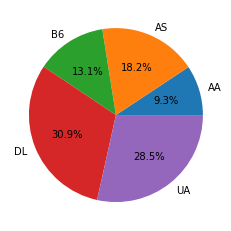

In [80]:
# We would plot a pie chart for the number of flights each carrier had for Seattle
plt.pie(fl_Sea_carrier['count'], labels = fl_Sea_carrier['carrier'],autopct='%1.1f%%'
)

In [81]:
#This pie chart tells that the carrier DL had the most number of flights to Seattle in 2013

In [82]:
#We would now find out which flight had the most arrival delay in Seattle. 
#we would remove the flights that arrived early
arrival_delay = flights_to_Sea[flights_to_Sea['arr_delay']>0]

In [83]:
#We would group by carrier and find mean of all columns including arrival delay

arrival_delay_mean = arrival_delay.groupby('carrier').mean()

In [84]:
#We reset the index
arrival_delay_mean.reset_index(level=0, inplace = True)

<BarContainer object of 5 artists>

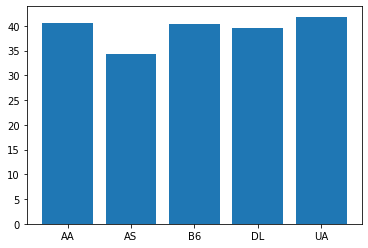

In [85]:
#We plot a bar graph for mean arrival_delay
plt.bar(arrival_delay_mean['carrier'], height = arrival_delay_mean['arr_delay'])

In [86]:
""" The above bar graph tells that the arrival delay of the carrier AS was least for the flights to Seattle.

"""

' The above bar graph tells that the arrival delay of the carrier AS was least for the flights to Seattle.\n\n'

In [87]:
""" So all this exploration gives us the percentage of flights operated by each carrier to Seattle and the mean arrival delay for each carrier.
We found that the carrier DL had the most number of flights to Seattle. We also found that the carrier AS had the least average arrival delay to Seattle. So if I am thinking about avialability of Seats in a carrier, I might select DL. If I am thinking about the arrival delay, I might select AS.

"""

' So all this exploration gives us the percentage of flights operated by each carrier to Seattle and the mean arrival delay for each carrier.\nWe found that the carrier DL had the most number of flights to Seattle. We also found that the carrier AS had the least average arrival delay to Seattle. So if I am thinking about avialability of Seats in a carrier, I might select DL. If I am thinking about the arrival delay, I might select AS.\n\n'

## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [88]:
# Your code here
#We would import weather.csv file
weather_df = pd.read_csv('weather.csv')


In [89]:
weather_df.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [90]:
#We would merge the weather and flight dataset based on year, month, day, origin. We are taking an inner join.

flights_weather = fl_df.merge(weather_df,on = ['year','month','day','origin'], how = 'inner')

In [91]:
#We would not plot the relationship between weather conditions and departure delays

In [92]:
#relationship of temperature and departure delay

#We would group by every given temperature we would find average departure delay
temp_dep_delay = flights_weather.groupby(('temp'), as_index = False)['dep_delay'].mean()


In [93]:
temp_dep_delay.head()

,temp,dep_delay
0,10.94,17.837838
1,12.02,21.121630
2,12.92,28.542828
3,14.00,26.358989
4,15.08,25.442299


Text(0.5, 1.0, 'temp vs dep_delay')

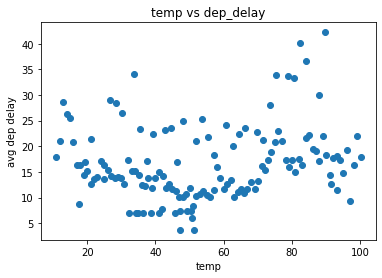

In [94]:
plt.scatter(temp_dep_delay.temp,temp_dep_delay.dep_delay)
plt.xlabel('temp')
plt.ylabel('avg dep delay')
plt.title('temp vs dep_delay')

In [95]:
""" At higher temperaures we find a few flights with comparatively higher departure delays, otherwise there is no clear corelation.

"""

' At higher temperaures we find a few flights with comparatively higher departure delays, otherwise there is no clear corelation.\n\n'

Text(0.5, 1.0, 'dewpoint vs dep_delay')

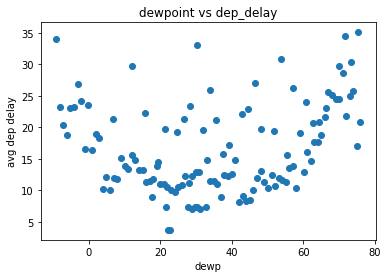

In [96]:
#relationship between departure delay and dew point
duepoint_dep_delay = flights_weather.groupby(('dewp'), as_index = False)['dep_delay'].mean()

plt.scatter(duepoint_dep_delay['dewp'],duepoint_dep_delay['dep_delay'])
plt.xlabel('dewp')
plt.ylabel('avg dep delay')
plt.title('dewpoint vs dep_delay')


In [97]:
"""It appears there is a parabolic relationship between dewpoint and departure delay.

"""

'It appears there is a parabolic relationship between dewpoint and departure delay.\n\n'

Text(0.5, 1.0, 'humidity vs dep_delay')

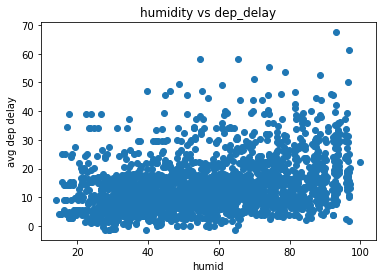

In [98]:
#relationship between departure delay and humidity
humidity_dep_delay = flights_weather.groupby(('humid'), as_index = False)['dep_delay'].mean()

plt.scatter(humidity_dep_delay['humid'],humidity_dep_delay['dep_delay'])
plt.xlabel('humid')
plt.ylabel('avg dep delay')
plt.title('humidity vs dep_delay')

In [99]:
"""
There appears to be a slight increase in departure delay with increase in humidity. It might be that rain impacts flight departure.
"""

'\nThere appears to be a slight increase in departure delay with increase in humidity. It might be that rain impacts flight departure.\n'

Text(0.5, 1.0, 'wind_dir vs dep_delay')

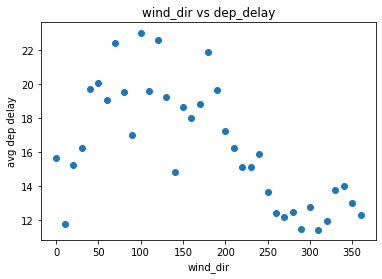

In [100]:
#relationship between departure delay and wind direction
wind_dir_dep_delay = flights_weather.groupby(('wind_dir'), as_index = False)['dep_delay'].mean()

plt.scatter(wind_dir_dep_delay['wind_dir'],wind_dir_dep_delay['dep_delay'])
plt.xlabel('wind_dir')
plt.ylabel('avg dep delay')
plt.title('wind_dir vs dep_delay')

In [101]:
"""
There is no clear pattern
"""

'\nThere is no clear pattern\n'

(0, 50)

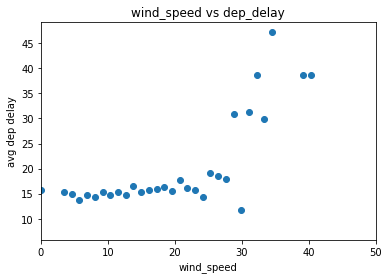

In [102]:
#relationship between departure delay and wind_speed
wind_speed_dep_delay = flights_weather.groupby(('wind_speed'), as_index = False)['dep_delay'].mean()

plt.scatter(wind_speed_dep_delay['wind_speed'],wind_speed_dep_delay['dep_delay'])
plt.xlabel('wind_speed')
plt.ylabel('avg dep delay')
plt.title('wind_speed vs dep_delay')
xlim([0,50])

In [103]:
"""
We find more departure delay at higher wind speed.
"""

'\nWe find more departure delay at higher wind speed.\n'

(0, 50)

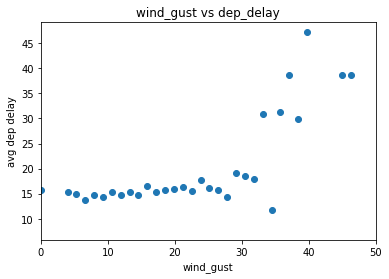

In [104]:
#relationship between departure delay and wind_gust
wind_gust_dep_delay = flights_weather.groupby(('wind_gust'), as_index = False)['dep_delay'].mean()

plt.scatter(wind_gust_dep_delay['wind_gust'],wind_gust_dep_delay['dep_delay'])
plt.xlabel('wind_gust')
plt.ylabel('avg dep delay')
plt.title('wind_gust vs dep_delay')
xlim([0,50])

In [105]:
"""
We find more departure delay at higher wind gust.
"""

'\nWe find more departure delay at higher wind gust.\n'

Text(0.5, 1.0, 'precipitation vs dep_delay')

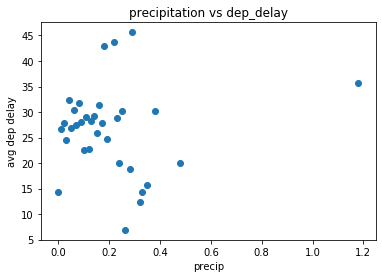

In [106]:
#relationship between departure delay and precipitation
precip_dep_delay = flights_weather.groupby(('precip'), as_index = False)['dep_delay'].mean()

plt.scatter(precip_dep_delay['precip'],precip_dep_delay['dep_delay'])
plt.xlabel('precip')
plt.ylabel('avg dep delay')
plt.title('precipitation vs dep_delay')
#xlim([0,50])

In [107]:
"""
There is no clear pattern
"""

'\nThere is no clear pattern\n'

Text(0.5, 1.0, 'pressure vs dep_delay')

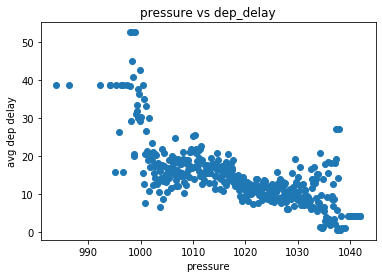

In [108]:
#relationship between departure delay and pressure
pressure_dep_delay = flights_weather.groupby(('pressure'), as_index = False)['dep_delay'].mean()

plt.scatter(pressure_dep_delay['pressure'],pressure_dep_delay['dep_delay'])
plt.xlabel('pressure')
plt.ylabel('avg dep delay')
plt.title('pressure vs dep_delay')
#xlim([0,50])

In [109]:
"""
Most of the delayed flights were at pressure around 1000 and then the departure delay had reduced with increase in pressure.
"""

'\nMost of the delayed flights were at pressure around 1000 and then the departure delay had reduced with increase in pressure.\n'

Text(0.5, 1.0, 'visibility vs dep_delay')

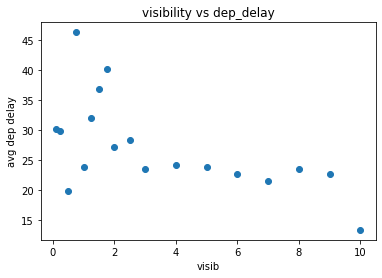

In [110]:
#relationship between departure delay and visibility
pressure_dep_delay = flights_weather.groupby(('visib'), as_index = False)['dep_delay'].mean()

plt.scatter(pressure_dep_delay['visib'],pressure_dep_delay['dep_delay'])
plt.xlabel('visib')
plt.ylabel('avg dep delay')
plt.title('visibility vs dep_delay')
#xlim([0,50])

In [111]:
"""
At low visibility, there were more departure delays
"""

'\nAt low visibility, there were more departure delays\n'

# Grading

* Q1: 1pt each question (5 in total)
* Q2: a) 2pt, b) 3pt, c) 2pt, d) 2pt, e) 1pt
* Q3: 5pt
* Q4: 5pt
* Q5: 15pt
* Q6: 10pt